<a href="https://colab.research.google.com/github/kxrrym03/ALX-Python-Exercises/blob/main/Least_Squares_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

# Load dataset and set the first column as the index
df = pd.read_csv('https://github.com/Explore-AI/Public-Data/blob/master/exports%20ZAR-USD-data.csv?raw=true', index_col=0)

# Rename columns to 'Y' for the dependent variable and 'X' for the independent variable
df.columns = ['Y', 'X']

In [ ]:
# Extract values of X and Y as numpy arrays for mathematical operations
X = df.X.values
Y = df.Y.values

# Calculate mean of X and Y
x_bar = np.mean(X)
y_bar = np.mean(Y)

# Calculate the slope (m) of the regression line using the least squares method
m = sum((X - x_bar) * (Y - y_bar)) / sum((X - x_bar) ** 2)

# Calculate the intercept (c) of the regression line
c = y_bar - m * x_bar

# Output the calculated slope and intercept
print("Slope = ", m)
print("Intercept = ", c)

Slope =  0.000113507257658843
Intercept =  1.8448114670426463


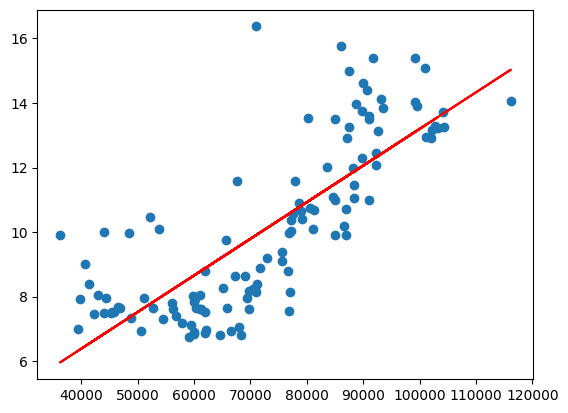

In [ ]:
def gen_y(x_list, m, c):
    y_gen = []
    for x_i in x_list:
        y_i = m*x_i + c
        y_gen.append(y_i)

    return(y_gen)

# Generate y-values for the given x-values in the dataset based on the calculated slope and intercept
y_gen = m * df.X + c

# Plot the original data points as a scatter plot
plt.scatter(df.X, df.Y)

# Plot the regression line using the generated y-values
plt.plot(df.X, y_gen, color='red')

plt.show()

In [ ]:
errors2 = np.array(y_gen - df.Y) # Calculate the residuals by subtracting the observed Y values from the generated Y values
print(np.round(errors2, 2))

[-0.7  -0.49 -0.32  0.43  0.61  0.75  1.17  1.04  0.72 -0.44 -2.14 -2.62
 -3.94 -3.16 -2.69 -2.54 -1.83 -1.32 -1.06 -1.57 -0.51 -0.63 -0.47 -0.49
 -0.82 -0.55  0.87  0.04  0.19  1.14  1.36  0.74  1.47  1.74  1.93  1.82
  0.67  1.25  2.47  1.82  2.01  2.8   2.37  2.5   2.99  1.75  2.46  1.58
  0.62  1.66  2.15  0.82  1.75  1.53  1.59  1.61  0.98  1.06  1.77  0.83
  0.09  1.1   0.93  1.32  1.06  0.58  1.82  0.96  0.59  1.57  1.47  0.23
 -0.12  0.51  0.24  0.1   0.41  0.4   1.01  0.15  1.2   0.8   0.36  0.42
 -2.04 -0.9   0.25 -0.68 -0.11 -0.26 -0.13 -1.19 -1.44 -2.02 -1.69 -3.21
 -6.47 -4.16 -3.14 -2.56 -2.27 -1.77 -2.27 -1.73 -0.91 -2.05 -0.78 -1.38
 -2.59 -1.49  0.39 -1.33  0.21  0.51 -0.76  0.33  0.28 -0.04  0.97  0.44]


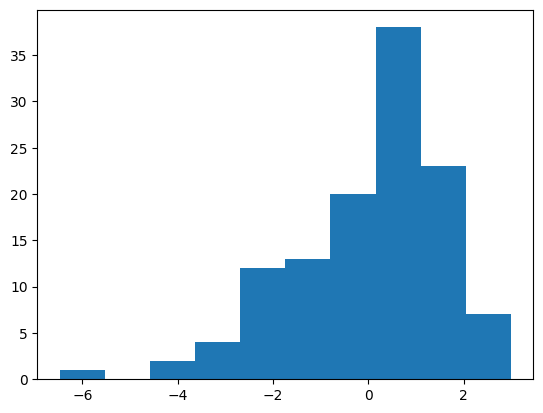

In [ ]:
plt.hist(errors2)
plt.show()

In [ ]:
# Calculate the residual sum of squares (RSS) by squaring the residuals and summing them up
print("Residual sum of squares:", (errors2 ** 2).sum())

Residual sum of squares: 321.45716655257655


In [ ]:
# Round off the sum of residuals to 11 decimal places to check for numerical stability or precision issues
np.round(errors2.sum(),11)


np.float64(-0.0)

### Linear Regression in sci-kit Learn

In [ ]:
# Import the LinearRegression class from scikit-learn's linear_model module
from sklearn.linear_model import LinearRegression

In [ ]:
# Initialise the LinearRegression model
lm = LinearRegression()

In [ ]:
# Reshape the X array to a 2D array as required by scikit-learn, converting from pandas Series to numpy array if necessary
X = df.X.values[:, np.newaxis]

In [ ]:
# Fit the linear model to the data
lm.fit(X, df.Y)

LinearRegression()

In [ ]:
# Extract the slope (coefficient) and intercept from the fitted model
m = lm.coef_[0]
c = lm.intercept_

In [ ]:
# Print the slope and intercept
print("Slope:\t\t", m)
print("Intercept:\t", c)

Slope:		 0.00011350725765884299
Intercept:	 1.844811467042648


### Getting model predictions

In [ ]:
# Use the fitted model to generate Y values from the X values
gen_y = lm.predict(X)

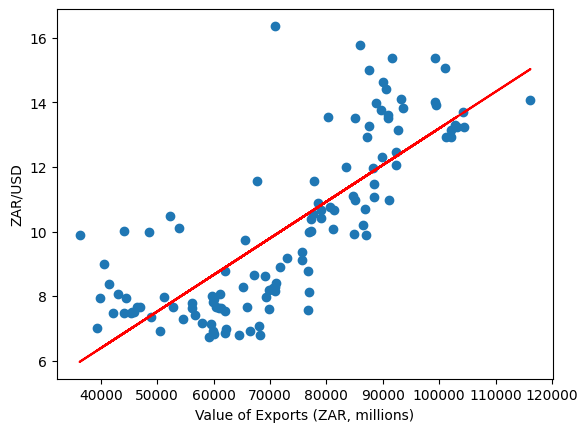

In [ ]:
# plot the results
plt.scatter(X, df.Y)  # Plot the original data
plt.plot(X, gen_y, color='red')  # Plot the line connecting the generated y-values

# Label the axes
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")

plt.show()

### Evaluating the model accuracy

In [ ]:
# Calculate and print the residual sum of squares (RSS) for the fitted model
print("Residual sum of squares:", ((gen_y - df.Y) ** 2).sum())

Residual sum of squares: 321.4571665525765


In [ ]:
# Import metrics from scikit-learn
from sklearn import metrics

In [ ]:
# Calculate and print the mean squared error (MSE) between the observed and predicted Y values
print('MSE:', metrics.mean_squared_error(df.Y, gen_y))

MSE: 2.6788097212714708


In [ ]:
# Calculate and print the RSS by multiplying the MSE by the number of observations
print("Residual sum of squares:", metrics.mean_squared_error(df.Y, gen_y)*len(X))

Residual sum of squares: 321.4571665525765


In [ ]:
# Calculate and print the R-squared value, a measure of how well the observed values are replicated by the model
print('R_squared:', metrics.r2_score(df.Y, gen_y))

R_squared: 0.6158417476896207
